# The Dataset: Immigration to Canada from 1980 to 2013

#### Import required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from pywaffle import Waffle
import folium
import plotly.express as px
import numpy as np
import json
%matplotlib inline

#### Read Immigration data from a csv file  

In [2]:
df_can = pd.read_csv('canada.csv')

#### The data at a glance

In [3]:
df_can.head()

Unnamed: 0        Type    Coverage          OdName  AREA AreaName   REG  \
0           0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1           1  Immigrants  Foreigners         Albania   908   Europe   925   
2           2  Immigrants  Foreigners         Algeria   903   Africa   912   
3           3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4           4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  ...  2004  2005  2006  2007  \
0    Southern Asia  902  Developing regions  ...  2978  3436  3009  2652   
1  Southern Europe  901   Developed regions  ...  1450  1223   856   702   
2  Northern Africa  902  Developing regions  ...  3616  3626  4807  3623   
3        Polynesia  902  Developing regions  ...     0     0     1     0   
4  Southern Europe  901   Developed regions  ...     0     0     1     1   

   2008  2009  2010  2011  2012  2013  
0  2111  1746  1758  2203  2635  2004  
1   560   716   561   539   620   603  
2  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0  
4     0     0     0     0     1     1  

[5 rows x 44 columns]

### Clean Data

In [4]:
df_can = df_can.iloc[:, 1:]
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

#### Some information about data in columns

In [5]:
df_can.columns

Index(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [6]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

Column names that are integers (such as the years) might introduce some confusion. For example, when referencing the year 2013, one might confuse that with the 2013th positional index. 

To avoid this ambiguity, let's convert the column names into strings: '1980' to '2013'.


In [7]:
df_can.columns = list(map(str, df_can.columns))

In [8]:
df_can.isnull().sum()

Type        0
Coverage    0
OdName      0
AREA        0
AreaName    0
REG         0
RegName     0
DEV         0
DevName     0
1980        0
1981        0
1982        0
1983        0
1984        0
1985        0
1986        0
1987        0
1988        0
1989        0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
dtype: int64

##### No missing values

#### Drop columns Type, Coverage, AREA, DEV and REG

In [9]:
df_can.drop(['Type', 'Coverage', 'AREA', 'DEV', 'REG'], axis=1, inplace=True)
df_can.head()

OdName AreaName          RegName             DevName  1980  1981  \
0     Afghanistan     Asia    Southern Asia  Developing regions    16    39   
1         Albania   Europe  Southern Europe   Developed regions     1     0   
2         Algeria   Africa  Northern Africa  Developing regions    80    67   
3  American Samoa  Oceania        Polynesia  Developing regions     0     1   
4         Andorra   Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   
2    71    69    63    44  ...  3616  3626  4807  3623  4005  5393  4752   
3     0     0     0     0  ...     0     0     1     0     0     0     0   
4     0     0     0     0  ...     0     0     1     1     0     0     0   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2  4325  3774  4331  
3     0     0     0  
4     0     1     1  

[5 rows x 38 columns]

#### Rename columns

In [10]:
df_can.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

#### Set Country column as Index

In [11]:
df_can.set_index('Country', inplace=True)
df_can.index.name = None
df_can

Continent              Region             DevName  1980  1981  \
Afghanistan         Asia       Southern Asia  Developing regions    16    39   
Albania           Europe     Southern Europe   Developed regions     1     0   
Algeria           Africa     Northern Africa  Developing regions    80    67   
American Samoa   Oceania           Polynesia  Developing regions     0     1   
Andorra           Europe     Southern Europe   Developed regions     0     0   
...                  ...                 ...                 ...   ...   ...   
Viet Nam            Asia  South-Eastern Asia  Developing regions  1191  1829   
Western Sahara    Africa     Northern Africa  Developing regions     0     0   
Yemen               Asia        Western Asia  Developing regions     1     2   
Zambia            Africa      Eastern Africa  Developing regions    11    17   
Zimbabwe          Africa      Eastern Africa  Developing regions    72   114   

                1982  1983  1984  1985  1986  ...  2004  2005  2006  2007  \
Afghanistan       39    47    71   340   496  ...  2978  3436  3009  2652   
Albania            0     0     0     0     1  ...  1450  1223   856   702   
Algeria           71    69    63    44    69  ...  3616  3626  4807  3623   
American Samoa     0     0     0     0     0  ...     0     0     1     0   
Andorra            0     0     0     0     2  ...     0     0     1     1   
...              ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   
Viet Nam        2162  3404  7583  5907  2741  ...  1816  1852  3153  2574   
Western Sahara     0     0     0     0     0  ...     0     0     1     0   
Yemen              1     6     0    18     7  ...   124   161   140   122   
Zambia            11     7    16     9    15  ...    56    91    77    71   
Zimbabwe         102    44    32    29    43  ...  1450   615   454   663   

                2008  2009  2010  2011  2012  2013  
Afghanistan     2111  1746  1758  2203  2635  2004  
Albania          560   716   561   539   620   603  
Algeria         4005  5393  4752  4325  3774  4331  
American Samoa     0     0     0     0     0     0  
Andorra            0     0     0     0     1     1  
...              ...   ...   ...   ...   ...   ...  
Viet Nam        1784  2171  1942  1723  1731  2112  
Western Sahara     0     0     0     0     0     0  
Yemen            133   128   211   160   174   217  
Zambia            64    60   102    69    46    59  
Zimbabwe         611   508   494   434   437   407  

[195 rows x 37 columns]

#### Add Total column

In [12]:
df_can['Total'] = df_can.select_dtypes(include=['int', 'float']).sum(axis=1)

df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
print('Cleaned Data')
df_can.head()

Cleaned Data


Continent  \
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
Pakistan                                            Developing regions    978   

                                                     1981   1982   1983  \
India                                                8670   8147   7338   
China                                                6682   3308   1863   
United Kingdom of Great Britain and Northern Ir...  24796  20620  10015   
Philippines                                          5921   5249   4562   
Pakistan                                              972   1201    900   

                                                     1984  1985  1986  ...  \
India                                                5704  4211  7150  ...   
China                                                1527  1816  1960  ...   
United Kingdom of Great Britain and Northern Ir...  10170  9564  9470  ...   
Philippines                                          3801  3150  4166  ...   
Pakistan                                              668   514   691  ...   

                                                     2005   2006   2007  \
India                                               36210  33848  28742   
China                                               42584  33518  27642   
United Kingdom of Great Britain and Northern Ir...   7258   7140   8216   
Philippines                                         18139  18400  19837   
Pakistan                                            14314  13127  10124   

                                                     2008   2009   2010  \
India                                               28261  29456  34235   
China                                               30037  29622  30391   
United Kingdom of Great Britain and Northern Ir...   8979   8876   8724   
Philippines                                         24887  28573  38617   
Pakistan                                             8994   7217   6811   

                                                     2011   2012   2013  \
India                                               27509  30933  33087   
China                                               28502  33024  34129   
United Kingdom of Great Britain and Northern Ir...   6204   6195   5827   
Philippines                                         36765  34315  29544   
Pakistan                                             7468  11227  12603   

                                                     Total  
India                                               691904  
China                                               659962  
United Kingdom of Great Britain and Northern Ir...  551500  
Philippines                                         511391  
Pakistan                                            241600  

[5 rows x 38 columns]

#### Descriptive Statistics of Numerical columns

In [13]:
df_can.describe()

1980          1981          1982          1983          1984  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean     508.394872    566.989744    534.723077    387.435897    376.497436   
std     1949.588546   2152.643752   1866.997511   1204.333597   1198.246371   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       13.000000     10.000000     11.000000     12.000000     13.000000   
75%      251.500000    295.500000    275.000000    173.000000    181.000000   
max    22045.000000  24796.000000  20620.000000  10015.000000  10170.000000   

              1985         1986          1987          1988          1989  \
count   195.000000   195.000000    195.000000    195.000000    195.000000   
mean    358.861538   441.271795    691.133333    714.389744    843.241026   
std    1079.309600  1225.576630   2109.205607   2443.606788   2555.048874   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.000000     0.500000      0.500000      1.000000      1.000000   
50%      17.000000    18.000000     26.000000     34.000000     44.000000   
75%     197.000000   254.000000    434.000000    409.000000    508.500000   
max    9564.000000  9470.000000  21337.000000  27359.000000  23795.000000   

       ...          2005          2006          2007          2008  \
count  ...    195.000000    195.000000    195.000000    195.000000   
mean   ...   1320.292308   1266.958974   1191.820513   1246.394872   
std    ...   4425.957828   3926.717747   3443.542409   3694.573544   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     28.500000     25.000000     31.000000     31.000000   
50%    ...    210.000000    218.000000    198.000000    205.000000   
75%    ...    832.000000    842.000000    899.000000    934.500000   
max    ...  42584.000000  33848.000000  28742.000000  30037.000000   

               2009          2010          2011          2012          2013  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean    1275.733333   1420.287179   1262.533333   1313.958974   1320.702564   
std     3829.630424   4462.946328   4030.084313   4247.555161   4237.951988   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       36.000000     40.500000     37.500000     42.500000     45.000000   
50%      214.000000    211.000000    179.000000    233.000000    213.000000   
75%      888.000000    932.000000    772.000000    783.000000    796.000000   
max    29622.000000  38617.000000  36765.000000  34315.000000  34129.000000   

               Total  
count     195.000000  
mean    32867.451282  
std     91785.498686  
min         1.000000  
25%       952.000000  
50%      5018.000000  
75%     22239.500000  
max    691904.000000  

[8 rows x 35 columns]

In [14]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))

### Explortory Analysis and Visualization

#### Total Immigration to Canada from 1980 - 2013

In [15]:
with open('world_countries.json', 'r') as file:
    world_geo = json.load(file)

df_can_chor = df_can.copy()
df_can_chor.index.name = 'Country'
df_can_chor.reset_index(inplace=True)

# Create a Folium map 
world_map = folium.Map(location=[0,0], zoom_start=2)

# Create a Choropleth layer
folium.Choropleth(
    geo_data=world_geo,
    name='Immigration to Canada 1980 - 2013',
    data=df_can_chor,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
).add_to(world_map)

# Add layer control to the map
folium.LayerControl().add_to(world_map)

# View map
world_map

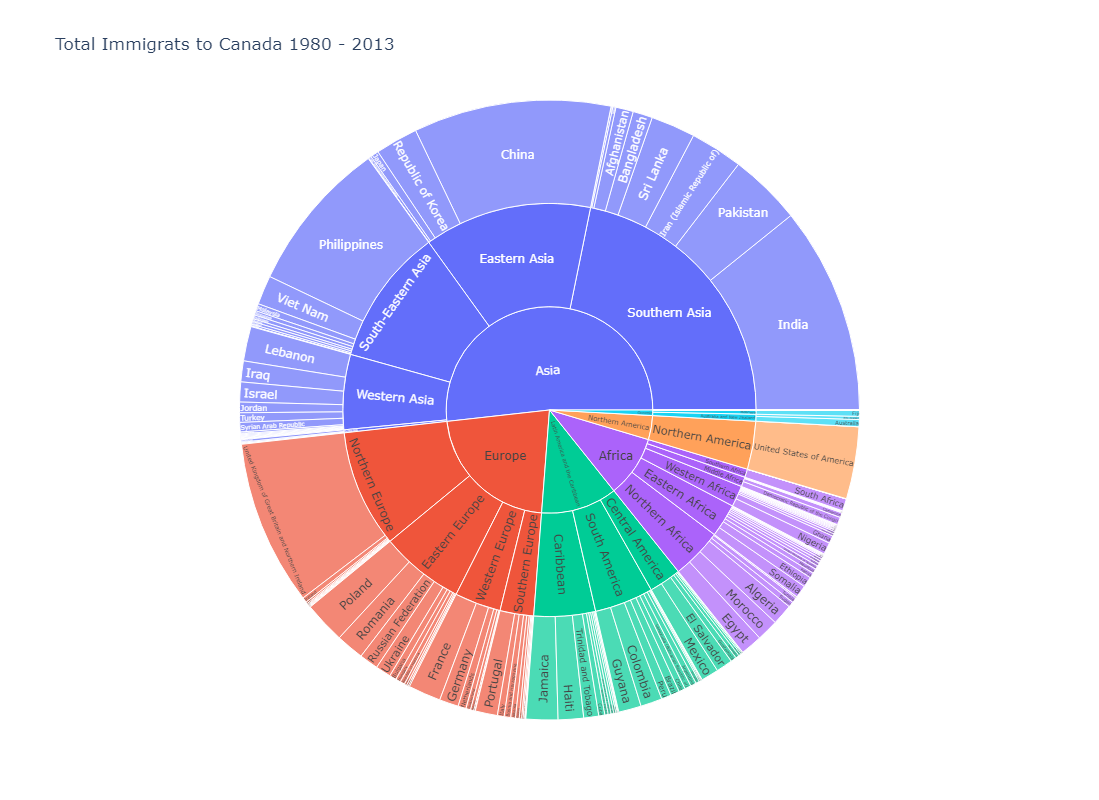

In [16]:
# Sunburst plot for total immigration
fig = px.sunburst(df_can_chor, path=['Continent', 'Region', 'Country'], values='Total', title='Total Immigrats to Canada 1980 - 2013')

fig.update_layout(width=1000, height=800) 
fig.show()

#### Immigrants from Countries by Continent

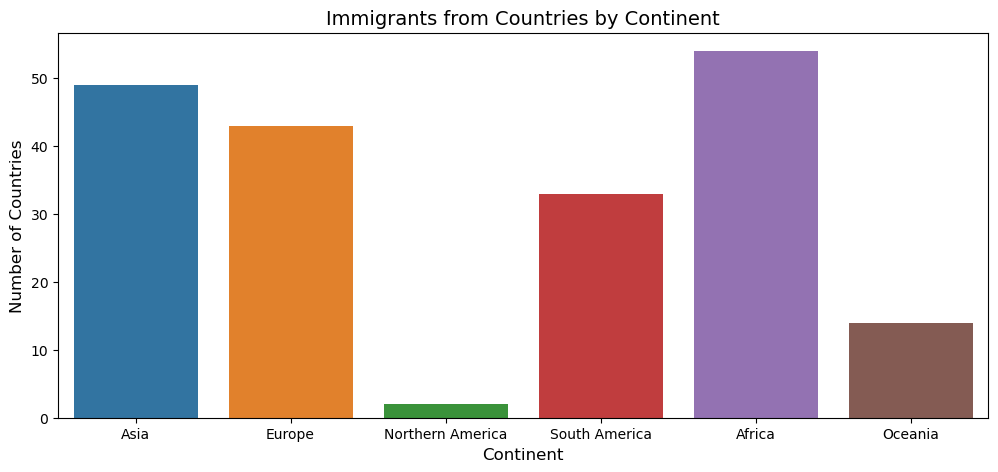

In [17]:
df_con = df_can.copy()
df_con['Continent'] = df_con['Continent'].replace({'Latin America and the Caribbean': 'South America'})

fig = plt.figure(figsize=(12, 5))

# Create a count plot using Seaborn
sns.countplot(data=df_con, x='Continent')

plt.ylabel('Number of Countries', fontsize=12)
plt.xlabel('Continent', fontsize=12)
plt.title('Immigrants from Countries by Continent', fontsize=14)
plt.show()

#### Immigration trend from 1980 - 2013

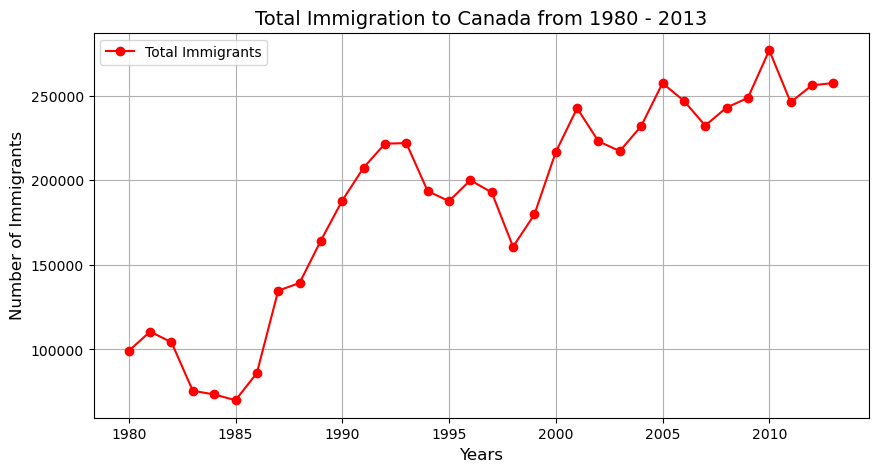

In [18]:
# Total immigrants
df_tot = df_can[years].sum(axis=0).reset_index()
df_tot.columns = ['Year', 'Total']
df_tot['Year'] = df_tot['Year'].astype(int)

# Line plot for total immigrants
df_tot.plot(x='Year', y='Total', marker='o', color='red', figsize=(10,5))

plt.ylabel('Number of Immigrants', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.title('Total Immigration to Canada from 1980 - 2013', fontsize=14)
plt.legend(['Total Immigrants'], loc='upper left')
plt.grid(True)
plt.show()

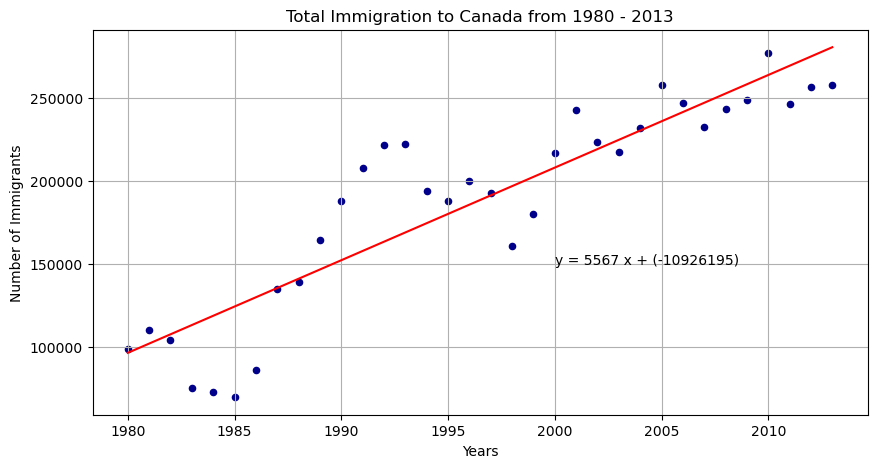

In [19]:
# Scatter plot for total immigrants
df_tot.plot(kind='scatter', x='Year', y='Total', color='darkblue', figsize=(10,5))
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

x = df_tot['Year']
y = df_tot['Total']
fit = np.polyfit(x, y, deg=1)
# Plot line of best fit
plt.plot(x, fit[0]*x + fit[1], color='red')
plt.annotate(f'y = {fit[0]:.0f} x + ({fit[1]:.0f})', xy=(2000, 150000))

plt.grid(True)
plt.show()

#### Haiti immigration plot

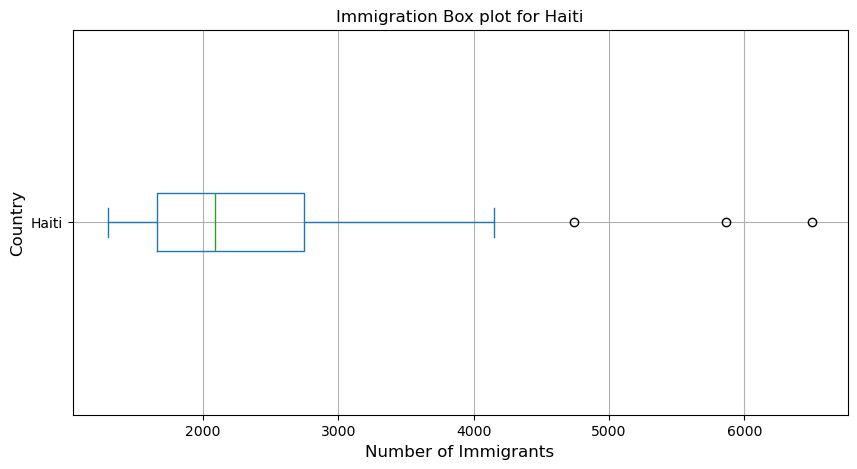

In [20]:
# Haiti immigrants
haiti = df_can.loc['Haiti', years]
haiti.index = haiti.index.map(int)

# Box plot for Haiti
haiti.plot(kind='box', vert=False, figsize=(10,5))

plt.xlabel('Number of Immigrants', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Immigration Box plot for Haiti')
plt.grid(True)
plt.show()

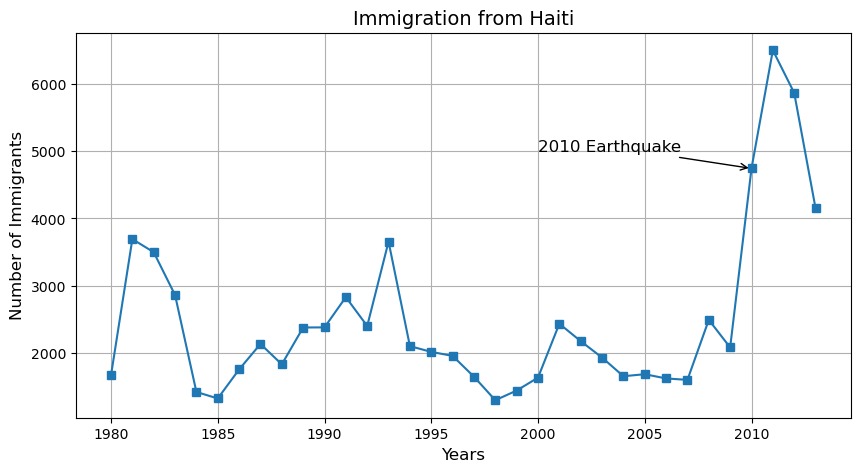

In [21]:
# Line plot for Haiti
haiti.plot(figsize=(10,5), marker='s')

plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of Immigrants', fontsize=12)
plt.title('Immigration from Haiti', fontsize=14)
plt.annotate('2010 Earthquake', xy=(2010, haiti[2010]), xytext=(2000, 5000),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
plt.grid(True)
plt.show()

#### China and India Immigration Plot

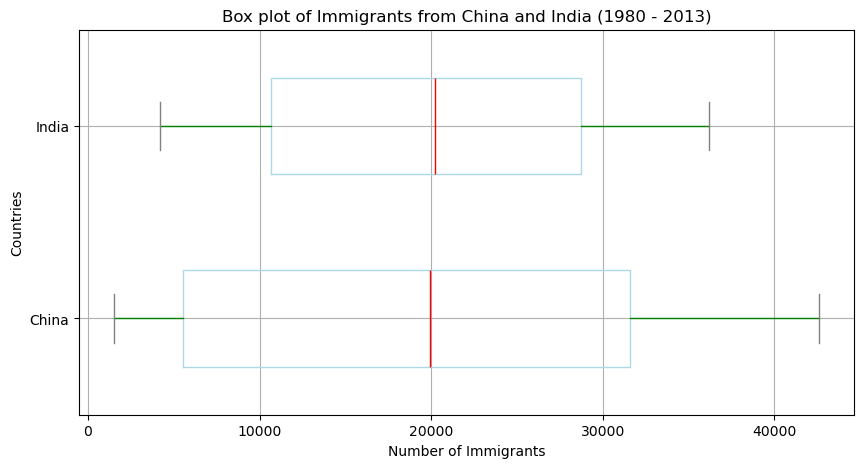

In [22]:
# China and India immigtants
C_I = df_can.loc[['China', 'India'], years]
C_I = C_I.transpose()
C_I.index = C_I.index.map(int)

# Box plot for China and India
C_I.plot(kind='box', vert=False, figsize=(10,5), widths=0.5, color=dict(boxes='lightblue', whiskers='green', medians='red', caps='gray'))

plt.title('Box plot of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.ylabel('Countries')
plt.grid(True)
plt.show()

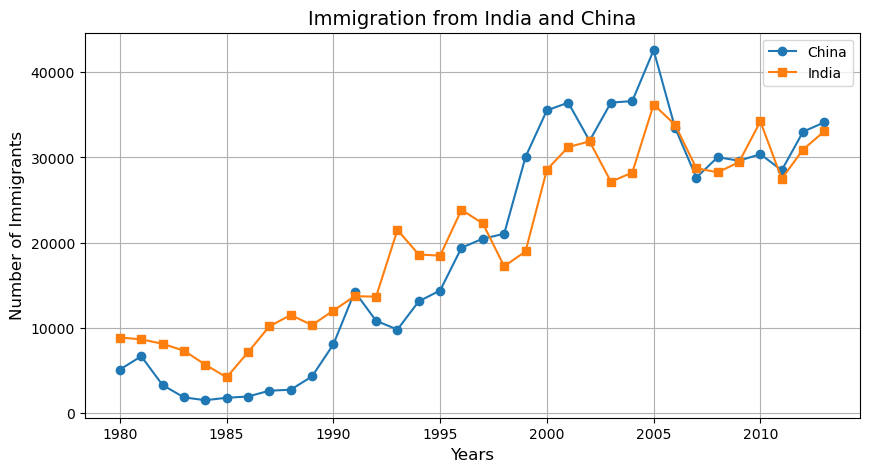

In [23]:
# Line plot for China and India
C_I.plot(figsize=(10,5), style=['o-', 's-'])

plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of Immigrants', fontsize=12)
plt.title('Immigration from India and China', fontsize=14)
plt.grid(True)
plt.show()

In [24]:
# Top 5 Countries
df_top5 = df_can.loc[:, years].head(5)
df_top5 = df_top5[years].transpose()
df_top5.index = df_top5.index.map(int)
df_top5.rename(columns={'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'}, inplace=True)
df_top5.sum()

India             691904
China             659962
United Kingdom    551500
Philippines       511391
Pakistan          241600
dtype: int64

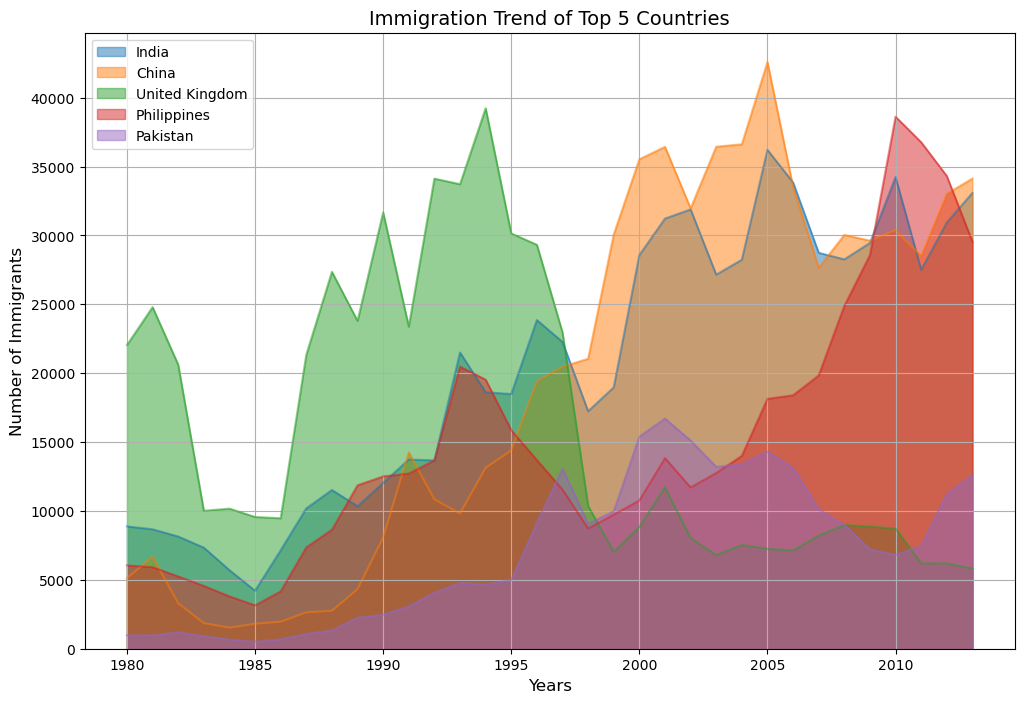

In [25]:
# Area plot for top 5 Countries
df_top5.plot(kind='area', stacked=False, figsize=(12,8)) # stacked=False: to not overlap the area

plt.xlabel("Years", fontsize=12)
plt.ylabel("Number of Immigrants", fontsize=12)
plt.title("Immigration Trend of Top 5 Countries", fontsize=14)
plt.grid(True)
plt.show()

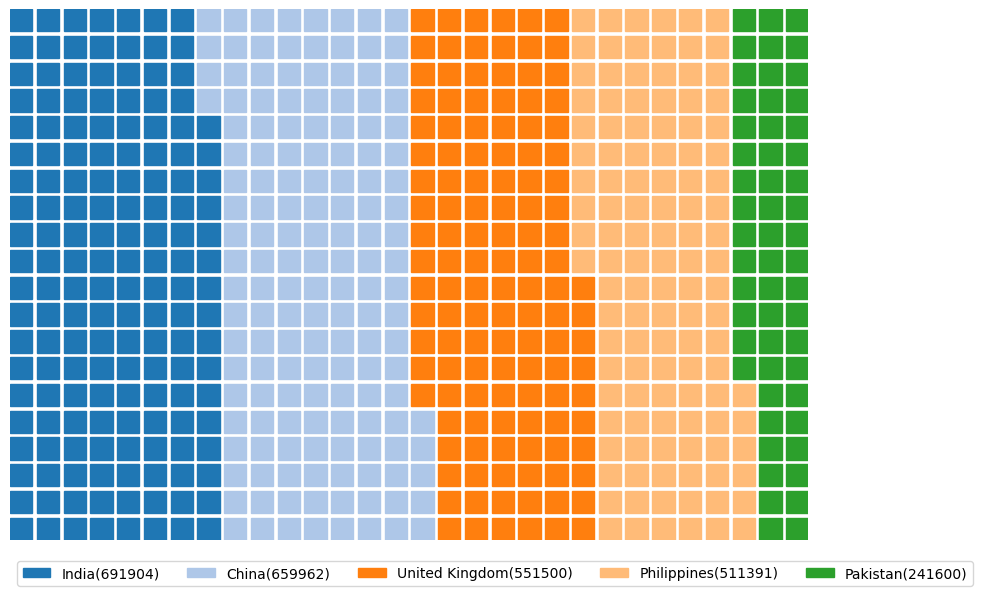

In [26]:
df_top5 = df_top5.transpose()
df_top5['Total'] = df_top5.sum(axis=1)

# Waffle plot for top 5 Countries
fig = plt.figure(FigureClass=Waffle,
                 figsize=(14,6),
                 rows=20, columns=30,
                 values=df_top5['Total'],
                 cmap_name='tab20',
                 legend={'labels': [f'{k}({v})' for k,v in zip(df_top5.index.values, df_top5.Total)],
                         'loc': 'lower left',
                         'bbox_to_anchor': (0, -0.1),
                         'ncol': 5}
                 )

plt.show()

#### Immigration from top 10 Countries

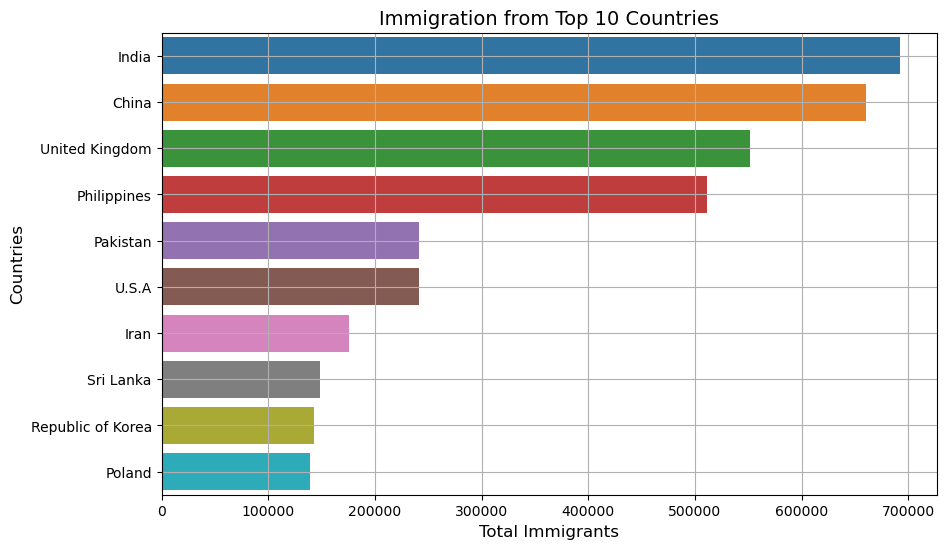

In [27]:
df_top10 = df_can.loc[:, years].head(10).sum(axis=1).reset_index()
df_top10.columns = ['Country', 'Total']
df_top10['Country'] = df_top10['Country'].replace({'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'})
df_top10['Country'] = df_top10['Country'].replace({'United States of America': 'U.S.A'})
df_top10['Country'] = df_top10['Country'].replace({'Iran (Islamic Republic of)': 'Iran'})

fig = plt.figure(figsize=(10,6))

# Bar plot for top 10 Countries
ax = sns.barplot(data=df_top10, x='Total', y='Country')

plt.xlabel('Total Immigrants', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.title('Immigration from Top 10 Countries', fontsize=14)
plt.grid(True)
plt.show()

#### Immigration plot for all countries in 2013

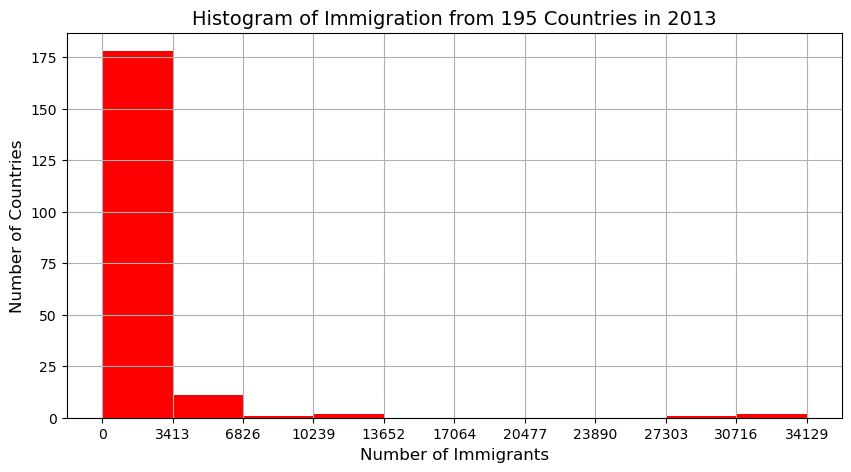

In [28]:
df_2013 = df_can['2013']

count, bin_edges = np.histogram(df_2013)

# Histogram plot for immigrants in 2013
df_2013.plot(kind='hist', xticks=bin_edges, color='red', figsize=(10,5))

plt.xlabel('Number of Immigrants', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.title('Histogram of Immigration from 195 Countries in 2013', fontsize=14)
plt.grid(True)
plt.show()

#### Immigration by Continent

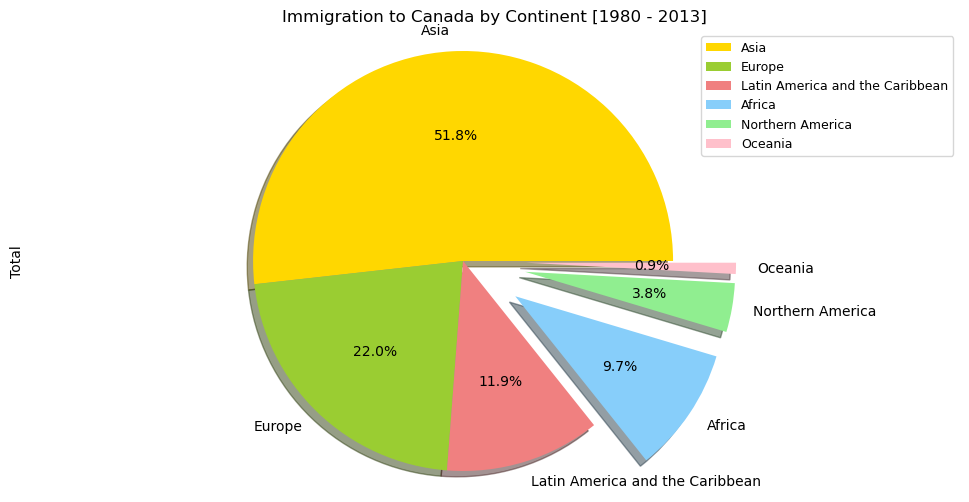

In [29]:
df_continent = df_can.groupby('Continent').Total.sum().sort_values(ascending=False)

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0, 0, 0, 0.3, 0.3, 0.3]  # explode out last three

# Pie plot for Continents
df_continent.plot(kind='pie', autopct='%1.1f%%', figsize=(12,6), startangle=0, shadow=True, colors=colors_list, explode=explode_list)

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')
plt.legend(labels=df_continent.index, loc='upper right', fontsize=9)
plt.show()

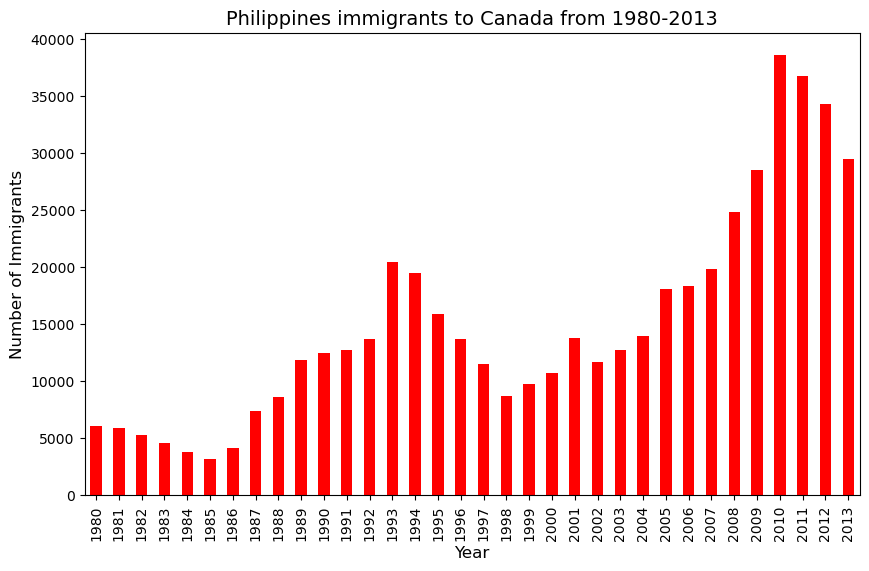

In [30]:
df_philippines = df_can.loc['Philippines', years]

# Bar plot for Philippines
df_philippines.plot(kind='bar', color='red', figsize=(10,6))
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Immigrants', fontsize=12)
plt.title('Philippines immigrants to Canada from 1980-2013', fontsize=14)
plt.show()

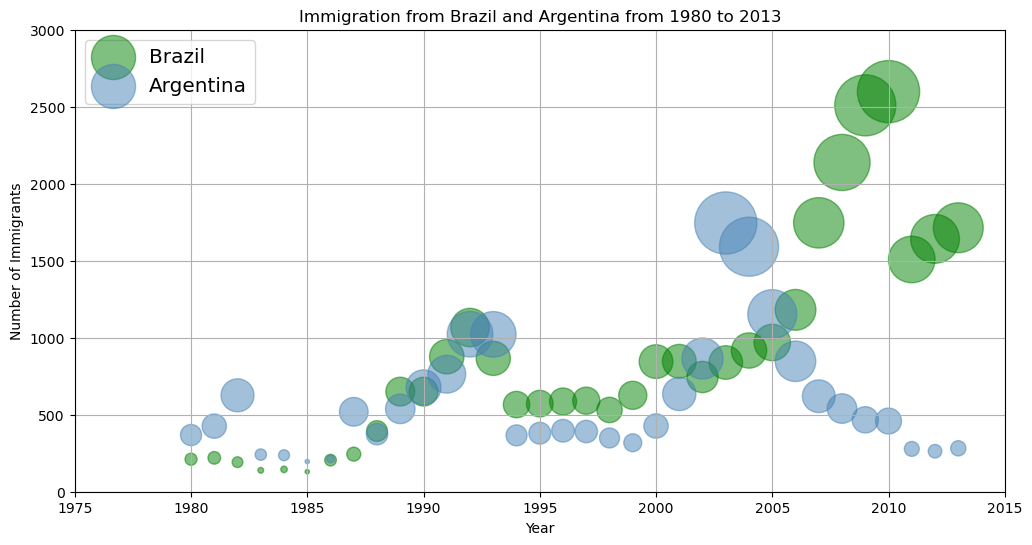

In [31]:
df_can_t = df_can[years].transpose()
df_can_t.index = df_can_t.index.astype(int)
df_can_t.index.name = 'Year'
df_can_t.reset_index(inplace=True)

# Normalised Value = (x-xmin)/(xmax-xmin)
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())
norm_arg = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())


fig, ax0 = plt.subplots(figsize=(12, 6))

# Scatter plot for Brazil
df_can_t.plot(
    kind='scatter', 
    x='Year', 
    y='Brazil', 
    color='green',
    xlim=(1975, 2015), 
    ylim=(0, 3000), 
    s=2000 * norm_brazil + 10,  # Adjust size of points
    alpha=0.5,
    ax=ax0  # Plot on the specified axes
)

# Scatter plot for Argentina on the same axes
df_can_t.plot(
    kind='scatter', 
    x='Year', 
    y='Argentina', 
    color='steelblue',
    s=2000 * norm_arg + 10,  # Adjust size of points
    alpha=0.5,
    ax=ax0  # Plot on the specified axes
)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')
ax0.grid(True)
plt.show()